In [1]:
%pylab inline 
import yt 
import plot_is

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


Finding the lowest rho values of the cloud --> edge of the cloud 

In [6]:
dens = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")
min(dens)

0.071234935974679836

In [12]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
from yt.mods import *
rho_c = 0.02806
scale_d = 3.92e-18
def compareplot1Dprofile(timestep):
    pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    sp = pf.sphere(pf.domain_center, (0.32,"pc"))
    rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
    plt.plot(rp.x.value,rp["density"].in_units("g/cm**3").value/(rho_c*scale_d),label="Simulation")#)
    #Numerical Integration of Lane Emden
    xi_max = 6.451
    def solvr(Y, t):
        return [Y[1], exp(-Y[0])-2/t*Y[1]]
    xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
    asol = integrate.odeint(solvr, [0, 0], xi)
    rho = np.exp(-asol[:,0]) #rho/rho_c
    r = xi/1.05e-17 #[cm]
#     plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
    plt.plot(r,rho,label ='Integration')#$\rho$')
    plt.xlabel("Physical radius [cm]",fontsize=15)
    plt.ylabel("Density/rho_c [g/cm^3]")
    plt.legend(loc='upper right',prop={'size':12},numpoints=1)

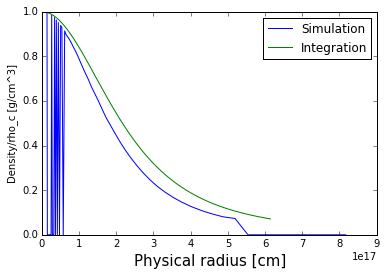

In [13]:
compareplot1Dprofile(1)


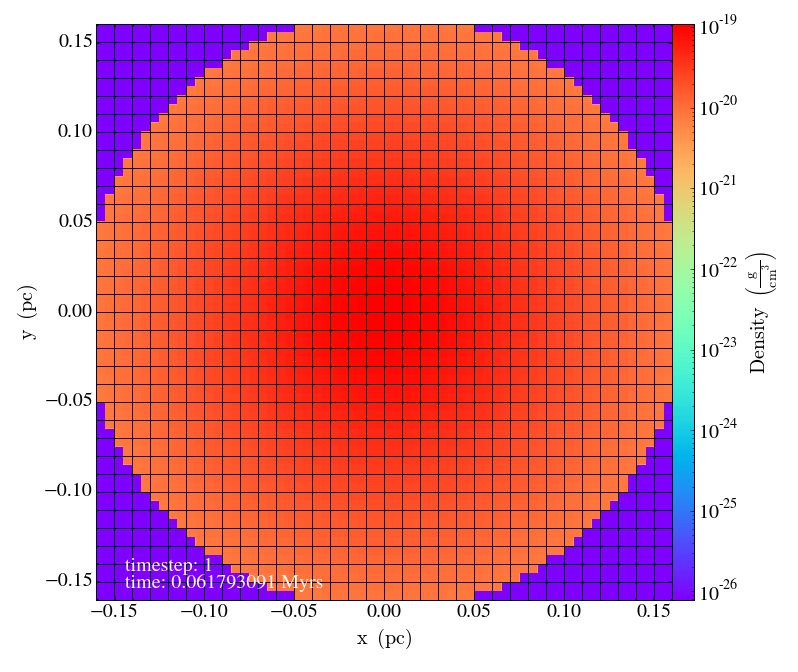

In [11]:
plot_is.plot_time_slice("density",1)

Boxlen = 20 = 0.32 not enough to fit a sphere that is 0.19pc*2 in size 


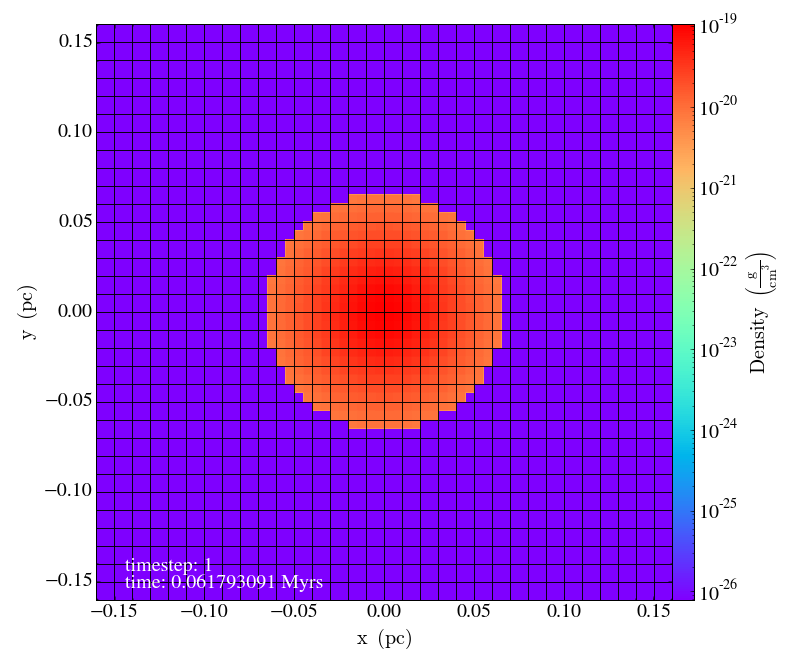

In [14]:
plot_is.plot_time_slice("density",1)

Changing the boxlen also affect the size of the grid-to-cell conversion


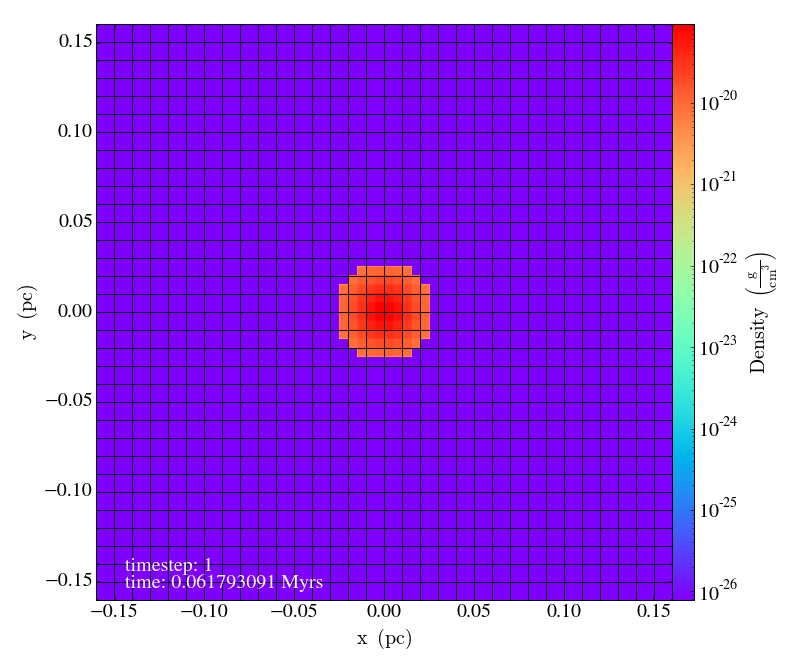

In [15]:
plot_is.plot_time_slice("density",1)

Strangely Changing the boxlen didn't really change the span displayed on x y axes, still around 0.32 pcs in span? Maybe just an yt thing? 


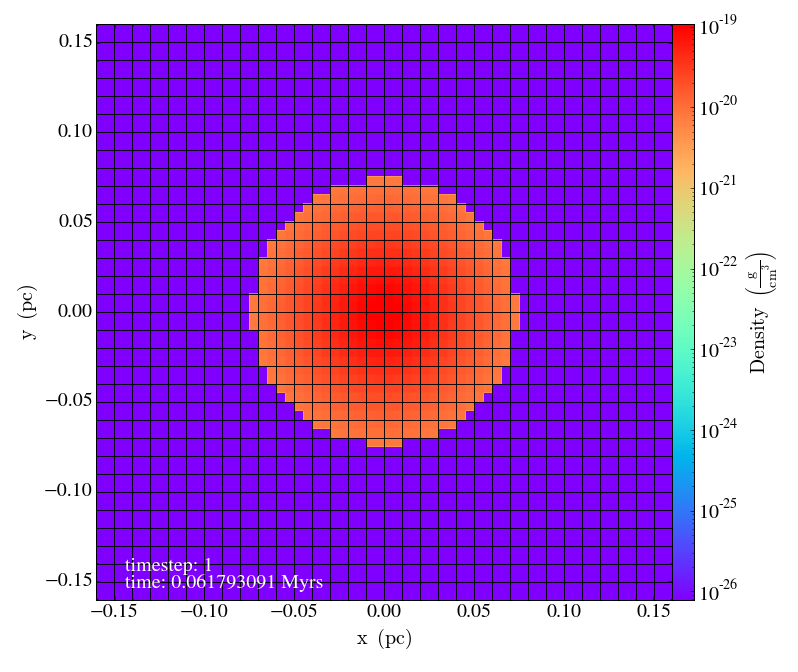

In [16]:
plot_is.plot_time_slice("density",1)

I  think boxlen is working propertly,I changed the boxlen to an absurdly large number and the span is no longer (-0.15,0.15) pcs 


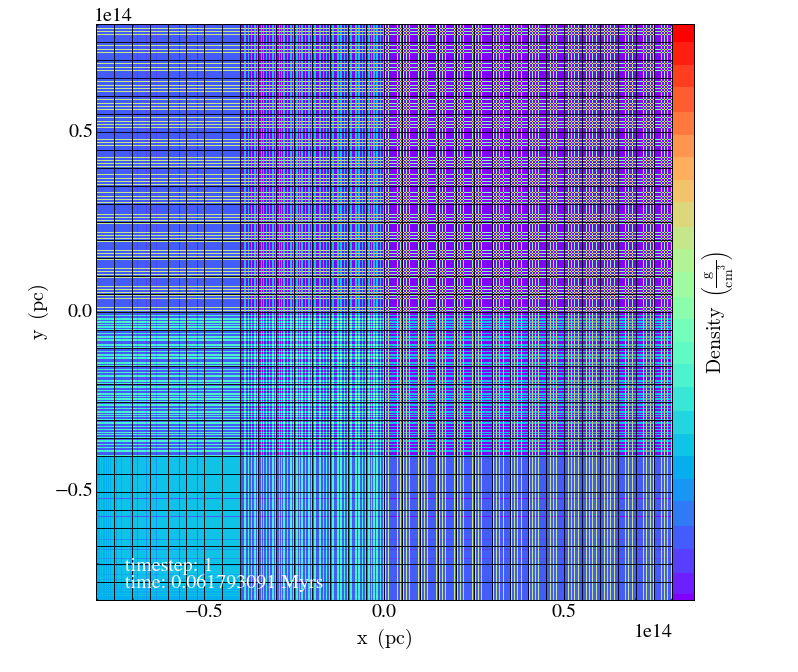

In [19]:
plot_is.plot_time_slice("density",1)


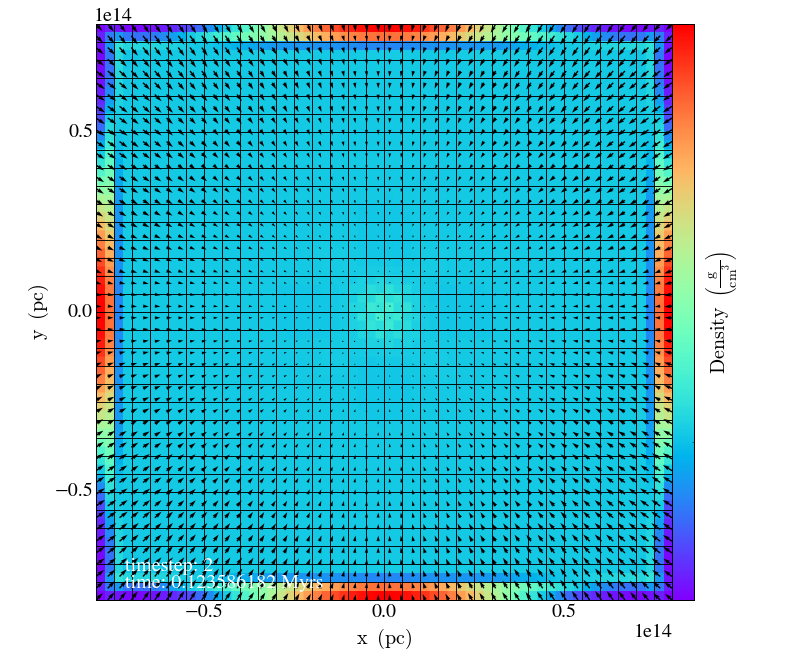

In [18]:
plot_is.plot_time_slice("density",2)

Boxlen=100


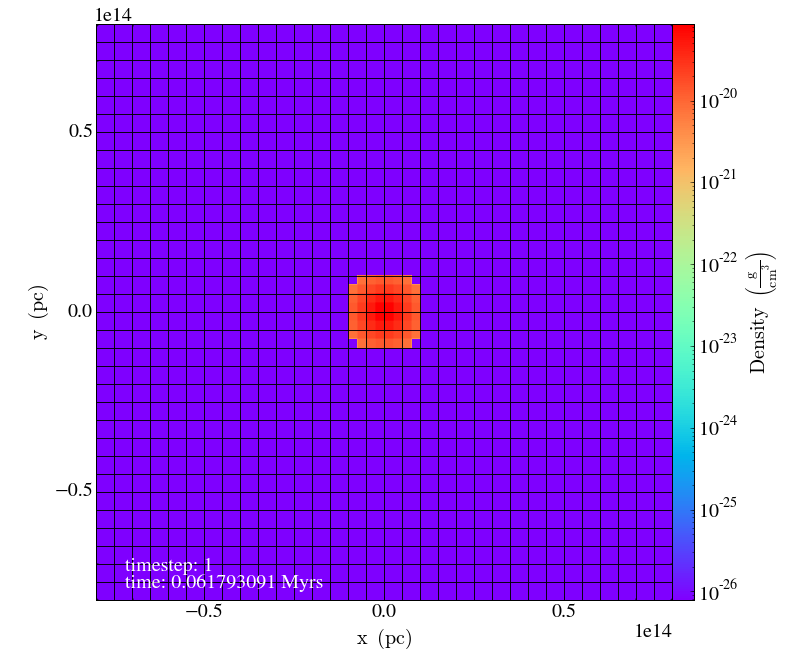

In [21]:
plot_is.plot_time_slice("density",1)

boxlen= 50


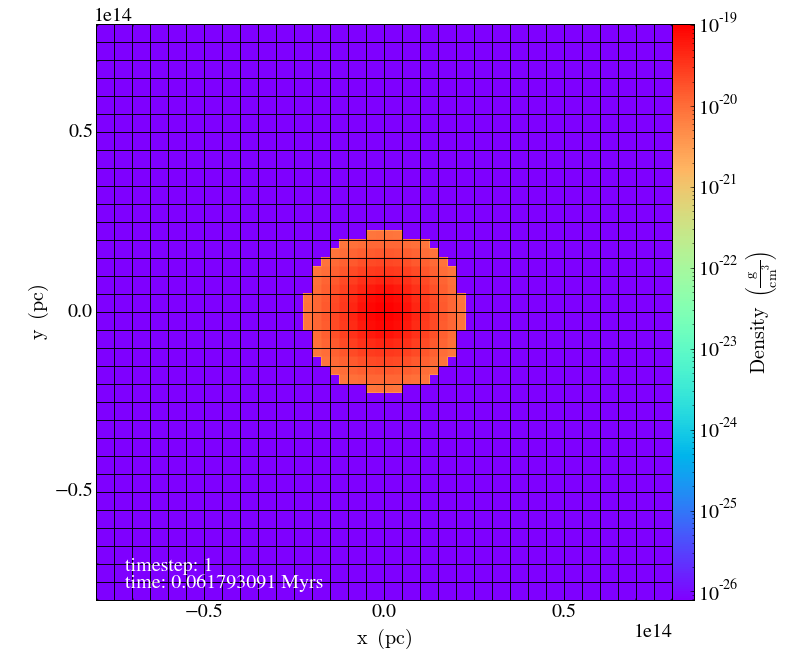

In [22]:
plot_is.plot_time_slice("density",1)


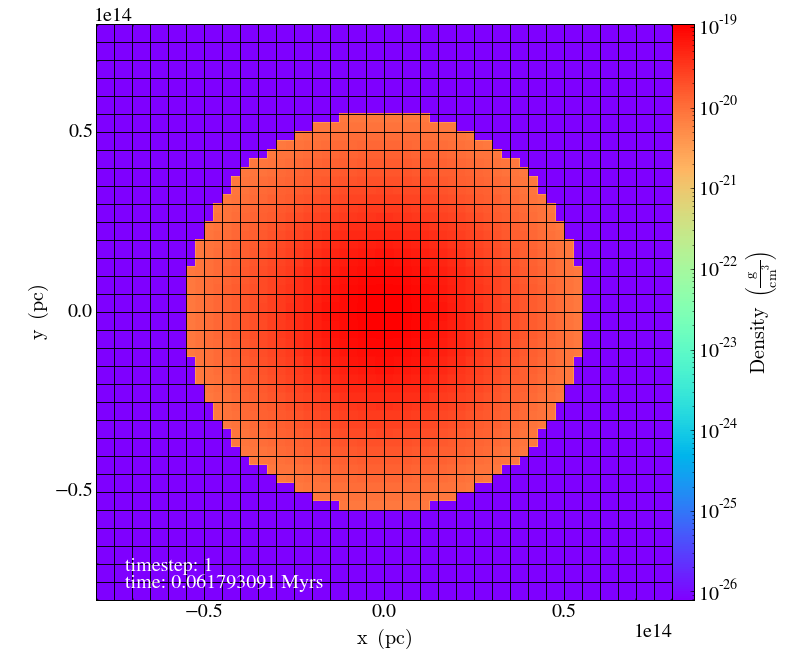

In [23]:
plot_is.plot_time_slice("density",1)

This is really weird because why is there a length scale of 1e14 on the axes now? So revert back to eveerything before and see if I could recreate the same result as before 


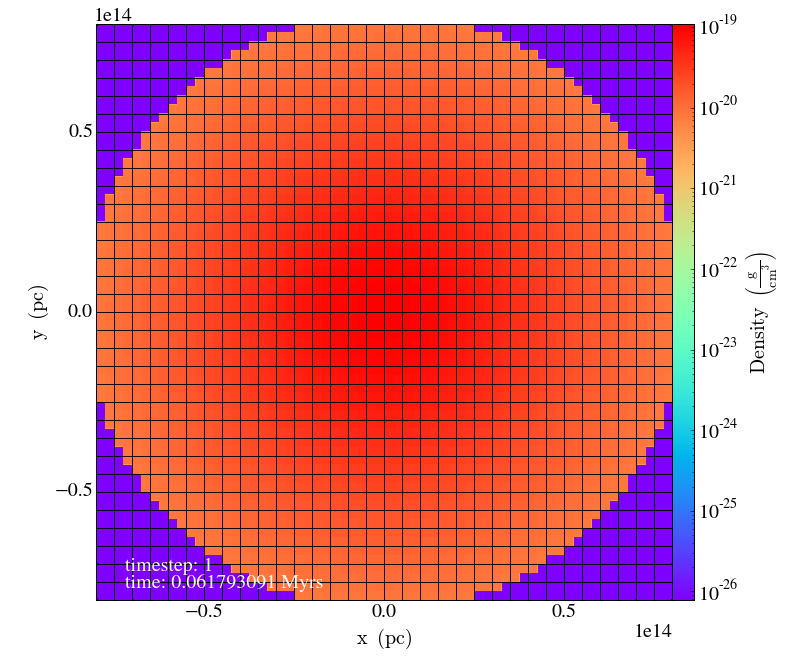

In [24]:
plot_is.plot_time_slice("density",1)

In [25]:
compareplot1Dprofile(1)

YTSphereTooSmall: 1.99599e-15 < 1.56250e-02